# Statisztika Házi 2024

A kiadott fileok bár valid csv fileok voltak, de valamiért bekerült idézőjelek közé minden sor, így egy oszlopnak érzékeli minden jóravaló csv parser. Először kiszedtem ezeket a fileokból.

In [4]:
!pip install scipy scikit-learn numpy pandas matplotlib statsmodels seaborn

     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     ---- ---------------------------------- 30.7/294.9 kB 1.3 MB/s eta 0:00:01
     ------------------ ------------------- 143.4/294.9 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# 1. Feladat

In [6]:
df = pd.read_csv('bead1.csv')
df.columns=["csokoládé", "gumicukor", "keksz", "fagylalt", "cukorka"]
df.head()

,csokoládé,gumicukor,keksz,fagylalt,cukorka
0,6.46,0.59,2.68,6.31,5.35
1,5.71,2.29,4.95,4.98,3.06
2,3.56,2.86,3.04,6.05,10.00
3,9.87,1.81,3.20,4.66,2.19
4,6.06,1.28,4.92,3.51,3.86


Az adatok betöltése után szemügyre vettem őket. Először ellenőriztem, hogy megfelelő formátumban vannak-e, illetve, hogy van-e hiányzó adat. (Nem volt.)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   csokoládé  50 non-null     float64
 1   gumicukor  50 non-null     float64
 2   keksz      50 non-null     float64
 3   fagylalt   50 non-null     float64
 4   cukorka    50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


Alap leíró statisztikák vizsgálata:

A gumicukor és a keksz átlagos cukortartalma alacsonyabb a többinél.

In [8]:
df.describe()

,csokoládé,gumicukor,keksz,fagylalt,cukorka
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.425800,2.055200,2.904600,5.476600,5.409600
std,2.879298,1.655914,1.635708,2.125727,3.130664
min,0.520000,0.140000,0.170000,1.300000,1.370000
25%,1.870000,0.830000,1.567500,3.732500,2.885000
50%,3.770000,1.545000,2.735000,5.690000,4.335000
75%,6.097500,3.085000,4.005000,7.177500,9.670000
max,9.900000,6.710000,7.240000,9.210000,10.000000


## Hipotézisvizsgálat

A feladat, igazából a következő: statisztikai teszttel igazolni, hogy az egyes édességek cukor tartalmainak eloszlása szignifikánsan eltér-e egymástól.

A statisztikai teszteknél fontos, hogy feltételezhető-e az adatok normalitása. Erre a feladat szövege alapján nem következtettem, ezért először vizuális módszerekkel vizsgáltam az adatok eloszlását:
- histogram
- Q-Q diagram
- Box diagram

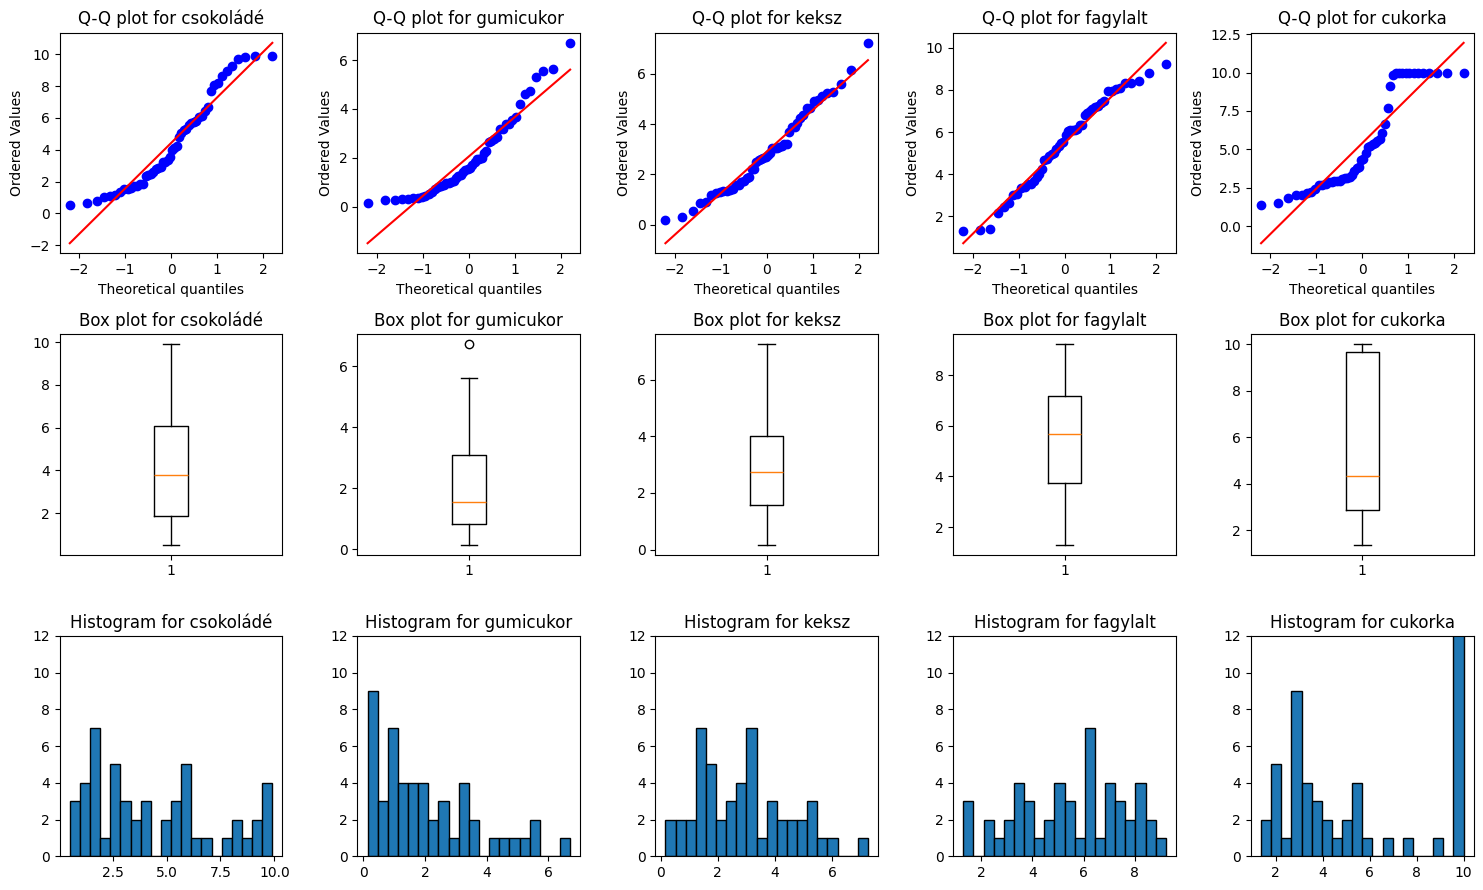

In [9]:
num_cols = len(df.columns)

# Create a figure with subplots
fig, axes = plt.subplots(3, num_cols, figsize=(3 * num_cols, 3*3))

# Plot Q-Q plots, box plots, and histograms for each column
for i, col in enumerate(df.columns):
    # Q-Q plot
    stats.probplot(df[col], dist="norm", plot=axes[0, i])
    axes[0, i].set_title(f'Q-Q plot for {col}')
    
    # Box plot
    axes[1, i].boxplot(df[col])
    axes[1, i].set_title(f'Box plot for {col}')
    
    # Histogram
    axes[2, i].hist(df[col], bins=20, edgecolor='k')
    axes[2, i].set_title(f'Histogram for {col}')
    axes[2, i].set_ylim(0, 12)

# Adjust layout
plt.tight_layout()
plt.show()

A vizuális tesztek alapján a csokoládé, gumicukor és cukorka nem tűnik normális eloszlásúnak. (A többiről elképzelhető.)

Alkalmazott tesztek:

- Shapiro-Wilk: Kis mintaszámra nagyon érzékeny.
- Kolmogorov-Szmirnov: Nagyobb mintákra jobban működik.

Megjegyzés: itt a mintaméret pont a határon mozog, ezért mindkettőt alkalmazom.

In [10]:
# Shapiro-Wilk test
for column in df.columns:
    print(column)
    stat, p = stats.shapiro(df[column])
    print(f'Shapiro-Wilk test for {column}: Statistics={stat}, p={p}')
    print('Gaussian' if p > 0.05 else 'not Gaussian')
    
    stat, p = stats.kstest(df[column], 'norm')
    print(f'Kolmogorov-Smirnov test for {column}: Statistics={stat}, p={p}')
    print('Gaussian' if p > 0.05 else 'not Gaussian')
    print()
    print()

csokoládé
Shapiro-Wilk test for csokoládé: Statistics=0.9207507402886187, p=0.002510198211111159
not Gaussian
Kolmogorov-Smirnov test for csokoládé: Statistics=0.7969916355360216, p=1.3541583493009124e-34
not Gaussian


gumicukor
Shapiro-Wilk test for gumicukor: Statistics=0.8963838006123647, p=0.00036577811375131363
not Gaussian
Kolmogorov-Smirnov test for gumicukor: Statistics=0.5787063256829237, p=2.0563747763314662e-16
not Gaussian


keksz
Shapiro-Wilk test for keksz: Statistics=0.9671433676514914, p=0.17668849756549837
Gaussian
Kolmogorov-Smirnov test for keksz: Statistics=0.7829768039768913, p=5.123302178166496e-33
not Gaussian


fagylalt
Shapiro-Wilk test for fagylalt: Statistics=0.9682123031160361, p=0.1955777702380786
Gaussian
Kolmogorov-Smirnov test for fagylalt: Statistics=0.9238226166278338, p=2.468422752668254e-56
not Gaussian


cukorka
Shapiro-Wilk test for cukorka: Statistics=0.8330440812060037, p=5.5434011566306335e-06
not Gaussian
Kolmogorov-Smirnov test for cukorka: S

Az eredmények alátámasztják a vizuális intuíciót. Adott 0.05-ös szignifikancia szint mellett valóban elvethető a normális eloszlás ténye a csoki, gumicukor és cukorka esetében, illetve a maradék esetekben nem egyezik a két teszt eredménye (határeset).

Mindenesetre az adatok normalitása nem feltételezhető, ezért nemparaméteres próbát alkalmazok az eloszlások összevetésére. Továbbá mivel nem 5 független mintáról van szó, ezért Kruskal-Wallis tesztet alkalmazok.

In [11]:
# Perform the Kruskal-Wallis test
stat, p = stats.kruskal(*[df[col] for col in df.columns])

print(f'Kruskal-Wallis H-test statistic: {stat}')
print(f'p-value: {p}')

if p < 0.05:
    print('There is a significant difference between the distributions of the columns (reject H0)')
else:
    print('There is no significant difference between the distributions of the columns (fail to reject H0)')

Kruskal-Wallis H-test statistic: 68.1814444597641
p-value: 5.492622584933163e-14
There is a significant difference between the distributions of the columns (reject H0)


## Post-hoc tesztek

A sejtéseket igazolva, a teszt 0.05-ös szignifikancia szint mellett elveti, hogy a minták egy eloszlásból jöttek volna. Tehát van szignifikáns különbség a cukor tartalmakban. A továbbiakban post-hoc teszteket futtatok, ehhez a nemparaméteres próbák közül a Mann-Whitney lesz a megfelelő.

In [12]:
# Perform pairwise Mann-Whitney U tests
results = []
columns = df.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        stat, p = stats.mannwhitneyu(df[columns[i]], df[columns[j]])
        similar = "similar" if p > 0.05 else "different"
        results.append({
            'Column1': columns[i],
            'Column2': columns[j],
            'U-statistic': stat,
            'p-value': p,
            'similarity': similar
        })

results_df = pd.DataFrame(results)
print("\nPairwise Mann-Whitney U test results:")
results_df



Pairwise Mann-Whitney U test results:


,Column1,Column2,U-statistic,p-value,similarity
0,csokoládé,gumicukor,1901.5,7.190926e-06,different
1,csokoládé,keksz,1607.5,1.384942e-02,different
2,csokoládé,fagylalt,922.5,2.417649e-02,different
3,csokoládé,cukorka,981.5,6.443487e-02,similar
4,gumicukor,keksz,852.0,6.137054e-03,different
5,gumicukor,fagylalt,271.5,1.559232e-11,different
6,gumicukor,cukorka,399.5,4.495334e-09,different
7,keksz,fagylalt,444.5,2.862014e-08,different
8,keksz,cukorka,652.5,3.801148e-05,different
9,fagylalt,cukorka,1356.5,4.645448e-01,similar


# 2. Feladat

## 0. Adatok vizsgálata

In [13]:
df = pd.read_csv('bead2.csv')
df.head()

,Y,X_1,X_2
0,1.55,0.90,0.71
1,6.70,8.35,8.51
2,2.78,3.21,3.44
3,2.25,1.87,1.70
4,0.00,0.41,0.60


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       50 non-null     float64
 1   X_1     50 non-null     float64
 2   X_2     50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [15]:
df.describe()

,Y,X_1,X_2
count,50.000000,50.00000,50.000000
mean,3.439800,4.74780,4.787200
std,2.346459,3.05704,3.020503
min,0.000000,0.05000,0.000000
25%,1.597500,1.77250,1.647500
50%,3.125000,5.39500,5.420000
75%,5.540000,6.91750,7.000000
max,7.590000,9.37000,9.420000


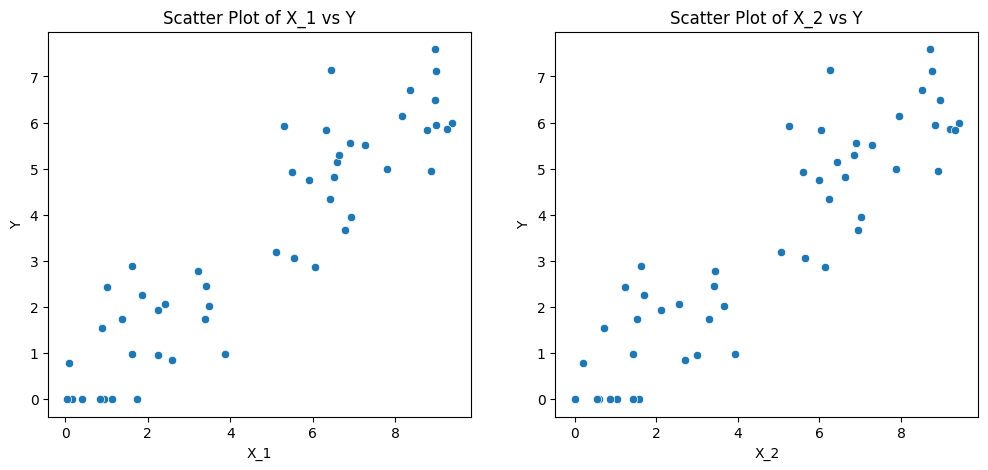

In [213]:
# Scatter plots to visualize relationships between columns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['X_1'], y=df['Y'])
plt.title('Scatter Plot of X_1 vs Y')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['X_2'], y=df['Y'])
plt.title('Scatter Plot of X_2 vs Y')
plt.show()

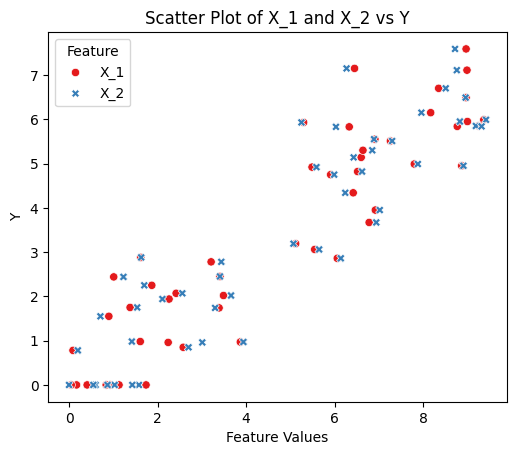

In [17]:
df_melted = pd.melt(df, id_vars='Y', value_vars=['X_1', 'X_2'], 
                    var_name='Feature', value_name='Value')

# Create a scatter plot with different colors for X_1 and X_2
sns.scatterplot(data=df_melted, x='Value', y='Y', hue='Feature', style='Feature', palette='Set1')

plt.title('Scatter Plot of X_1 and X_2 vs Y')
plt.xlabel('Feature Values')
plt.ylabel('Y')

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

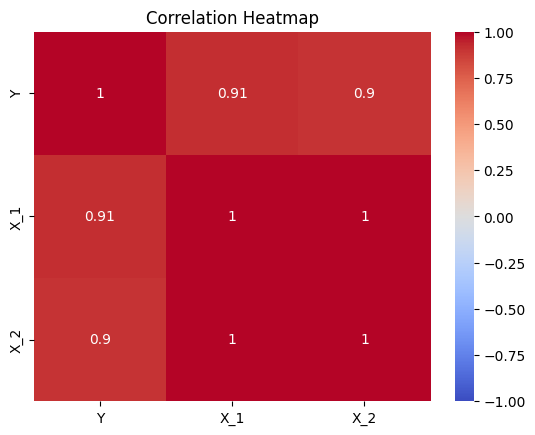

In [18]:
# Correlation analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

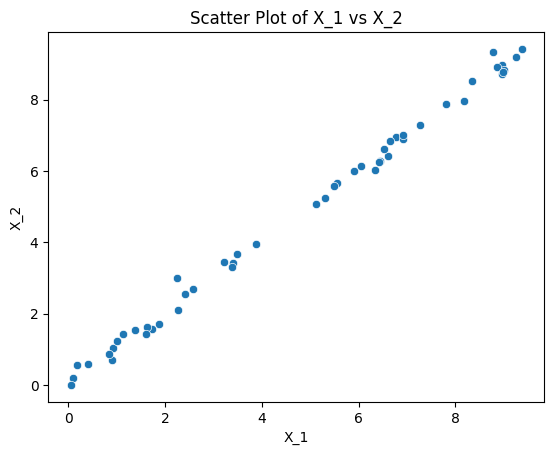

In [19]:
# Scatter plot of X_1 vs X_2 to check for multicollinearity
sns.scatterplot(x=df['X_1'], y=df['X_2'])
plt.title('Scatter Plot of X_1 vs X_2')
plt.show()

A leíró statisztikák nagy hasonlóságot mutatnak a két magyarázó változó tekintetében. Amire a további vizuálizációk is rámutatnak. Ennek feltételezett oka, hogy az édességek kalória tartalmát főként a cukor adja, így a kettő érték erősen korrelált valóban. (Ritka esetek egyike, amikor a magas korreláció mellett valóban ok-okozati viszony van.)

## 1. Becslések

### Együtthatók pontbecslése

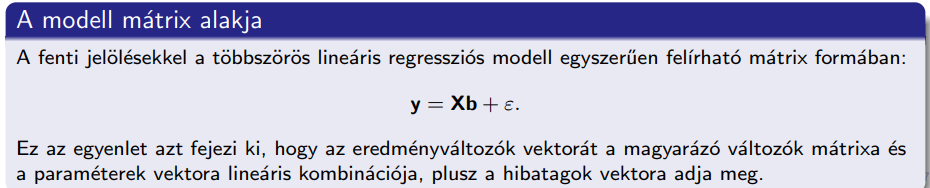

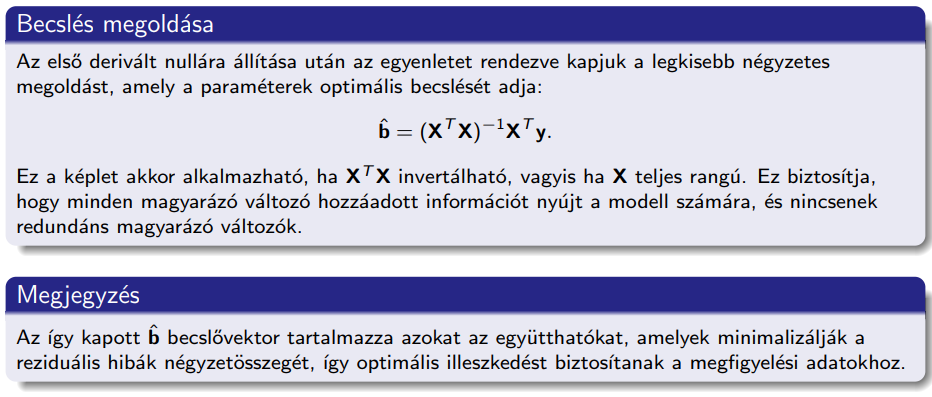

In [29]:
X_ = df[['X_1', 'X_2']].values
ones_column = np.ones((X_.shape[0], 1))
X = np.hstack((ones_column, X_))

print("Együtthatók pontbecslése:")
b = np.linalg.inv(X.T @ X) @ X.T @ df['Y'].values
print(b)
print()
print("Standardizált együtthatók:")
y_d, *x_d = df[["Y", "X_1", "X_2"]].std().values
b_ = x_d/y_d * b[1:]
print(f"Beta_X_1={round(b_[0], 2)}, Beta_X_2={round(b_[1], 2)}")
print()
print("Modell: ")
print(f"Y = {round(b[0], 2)} + {round(b[1], 2)}*X_1 + ({round(b[2], 2)})*X_2")

Együtthatók pontbecslése:
[ 0.25099416  2.02732984 -1.3445335 ]

Standardizált együtthatók:
Beta_X_1=2.64, Beta_X_2=-1.73

Modell: 
Y = 0.25 + 2.03*X_1 + (-1.34)*X_2


Bár a magyarázó változók eléggé korreláltak, a standardizált együtthatók megmutatják, hogy ...

### Előrejelzés készítése

A modell ilyen értékekre nem fog jól működni, mert illesztés során az X_1 és X_2 változók csak egy kis tartományát vizsgáltuk. Az hogy az adatok egy kis tartományon lineáris kapcsolatot sejtetnek, nem jelenti hogy kiterjesztett esetben is.

Sőt ez nyilván várható is mivel Y tartománya 0-10, akkor hiába lineárisan nő ha a kalória tartalom is 0-10 között van, de ha kilépünk a tartományból Y akkor is maximum 10 lehet.

Ilyenkor tippelhetünk például a tartományhatárokra, vagy skálázhatjuk a magyarázó változókat (pl.: kalória -> log(kalória)), de ekkor is fennállhat hogy a lineáris modell nem jól illeszkedik.

In [30]:
print(f"Előrejelzés X_1=450, X_2=30 => Y={np.array([1., 450., 30.]) @ b}")

Előrejelzés X_1=450, X_2=30 => Y=872.2134153169116


### Konfidenciaintervallum az együtthatókra

Első lépésként számoljuk ki a becsült hibavarianciát/szórást, melyre szükség lesz a továbbiakban.

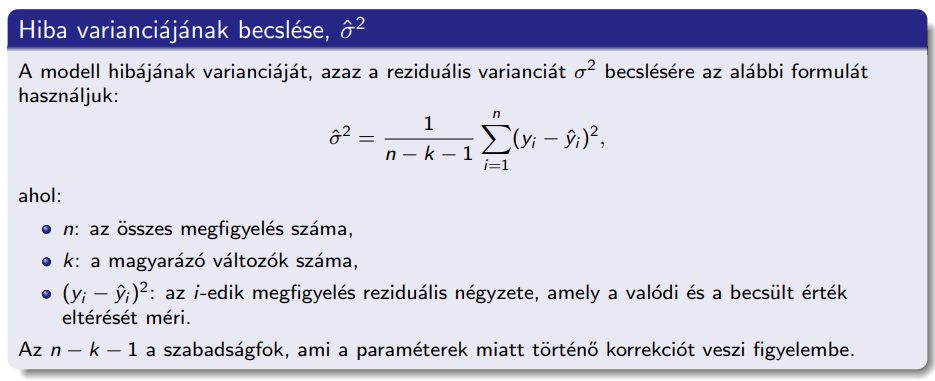

In [43]:
Y = df["Y"].values
e = Y - (X @ b)

n, k_ = X.shape
k = k_ - 1 # k denotes the number of feature variables

sigma_2 = e.var(ddof=k + 1) # sqrt(sum(e**2) / (n - k - 1))

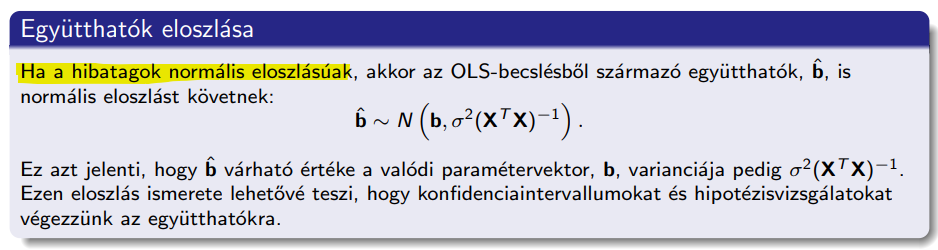

A hibatagok normalitását és egyéb tulajdonságait egy későbbi részfeladatban vizsgálom.

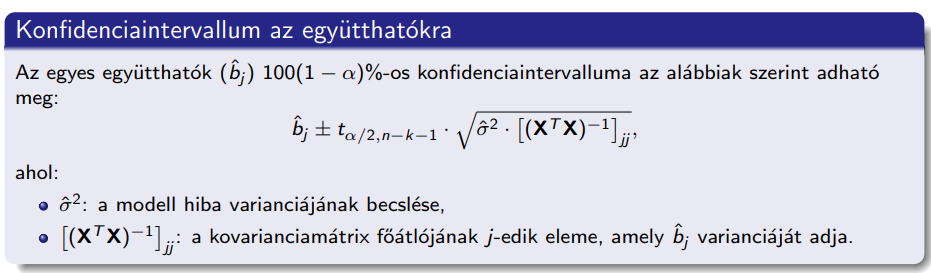

A paraméterek konfidenciaintervalluma t-eloszlás szerint becsülhető, mivel a szórást az adatokból becsültük.

In [45]:
alpha = 0.05  # 95% confidence interval

coeffs = np.sqrt(sigma_2*np.diag(np.linalg.inv(X.T @ X)))
t_critical = stats.t.ppf(1 - alpha / 2, df=(n-k-1))  # Two-tailed
confidence_intervals = np.array([
    [b[i] - t_critical * coeffs[i], b[i] + t_critical * coeffs[i]]
    for i in range(len(b))
])

print("Konfidencia intervallumok az egyes paraméterekre:")
pd.DataFrame({
    'Coefficient': ['Intercept', 'X_1', 'X_2'],
    'Estimate': b,
    '95% CI Lower': confidence_intervals[:, 0],
    '95% CI Upper': confidence_intervals[:, 1]
})

Konfidencia intervallumok az egyes paraméterekre:


,Coefficient,Estimate,95% CI Lower,95% CI Upper
0,Intercept,0.250994,-0.262926,0.764915
1,X_1,2.027330,0.689020,3.365640
2,X_2,-1.344533,-2.699031,0.009964


### Előrejelzési intervallum

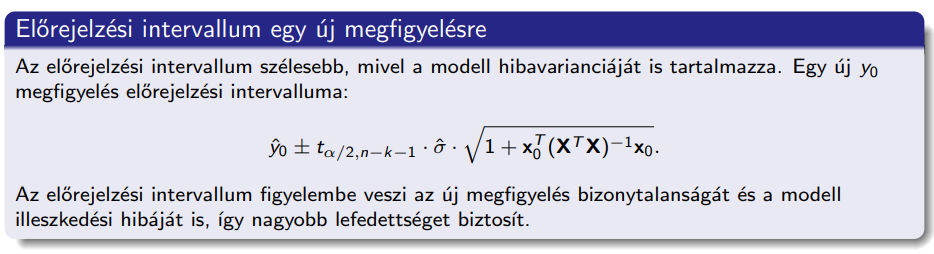

... így nagyobb lefedettséget biztosít, mint a konfidencia intervallum a becslésre. (Nem összekeverendő az előző részfeladatban, paramétere számolt konfidencia intervallummal.)

In [46]:
x0 = np.array([1., 450., 30.])
y0 = x0 @ b

In [53]:
alpha = 0.05  # 95% confidence interval
t_critical = stats.t.ppf(1 - alpha / 2, df=(n-k-1)) # Two-tailed
delta = t_critical * np.sqrt(sigma_2) * np.sqrt(1 + (x0.T @ np.linalg.inv(X.T @ X) @ x0))
(round(y0 - delta, 2), round(y0 + delta, 2))

(np.float64(310.4), np.float64(1434.03))

## 2. Illeszkedés diagnosztika

### Determinációs együttható, és korrigált változata:

Az R^2 azt jelzi, hogy a modell által tartalmazott magyarázó változók mennyire járulnak hozzá az eredményváltozó előrejelzéséhez. Minél magasabb az annál több információt nyerünk a modellből a magyarázó változókról. Értékkészlete: [0,1]

In [55]:
Y_hat = (X @ b)
Y = df["Y"].values
SST = np.sum((Y - Y_hat.mean())**2)
SSR = np.sum((Y_hat - Y_hat.mean())**2)
SSE = e.T @ e

assert SSR + SSE - SST < 1e-10

In [56]:
R2 = SSR/SST
R2

np.float64(0.8486364793397232)

Az R^2 értéke mindig növekszik, amikor újabb magyarázó változót adunk a modellhez, még akkor is, ha az új változó nem ad lényeges információt az eredményváltozóról. Ezért körültekintő változóválasztás szükséges, hogy csak valóban releváns tényezők kerüljenek be a modellbe.

Ha túl sok irreleváns változót adunk a modellhez:

- növeljük a modell komplexitását,
- megnehezíthetjük az elemzést,
- és csökkenthetjük a modell általánosíthatóságát.

A cél:

Egy olyan modell kialakítása, amely a lehető legkevesebb változóval magyarázza a lehető legtöbb információt.

Megoldás:

Az **adjustált R^2** egy módosított mérőszám, amely figyelembe veszi a modell változóinak számát.

Ellentétben a sima R^2-tel, az adjustált R^2 csökkenhet is, ha egy új prediktor nem járul érdemben hozzá a modell teljesítményéhez. Ezáltal véd a túlillesztés ellen:

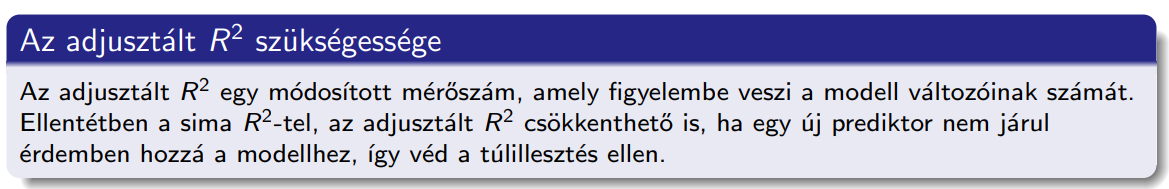

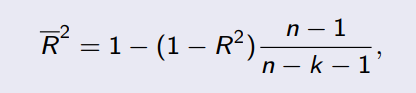

In [58]:
n, k_ = X.shape
k = k_ - 1
R2_ = 1-(1-R2)*((n-1)/(n-k-1))
R2_

np.float64(0.8421954784605625)

Ezzel már érdemben meg lehetne vizsgálni, hogy X_2 magyarázó változó nélkül vajon nő vagy csökken az adjusztált R_2.

## 3. Modelldiagnosztika

### Modelldiagnosztikai tesztek

Modell szignifikanciája:

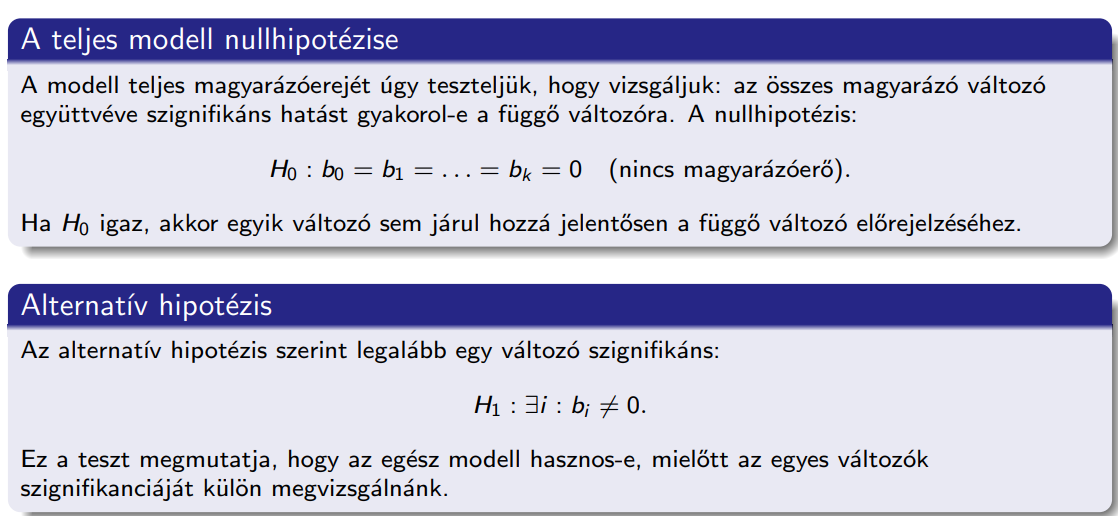

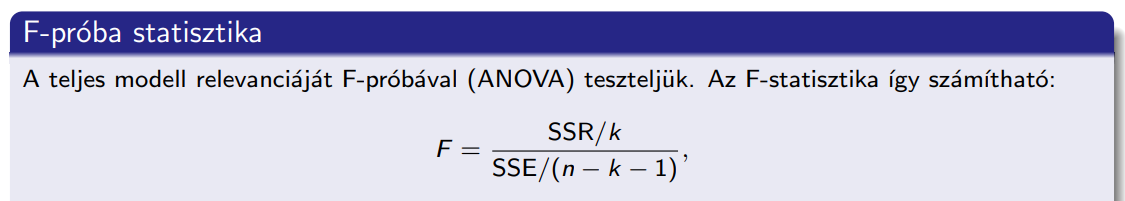

In [71]:
alpha = 0.05

F = (SSR/k) / (SSE/(n-k-1))
F_critical = stats.f.ppf(1-alpha, dfn=k, dfd=n-k-1)
if F > F_critical:
    print(f'Reject H0, F={F} > F_critical={F_critical}')
    print('A modellnek van releváns magyarázó ereje')
else:
    print(f'Fail to reject H0, F={F} < F_critical={F_critical}')
    print('A modellnek nincs releváns magyarázó ereje')

Reject H0, F=85.96804540352328 > F_critical=2.806844928806253
A modellnek van releváns magyarázó ereje


### Változók szignifikanciájának tesztelése

In [65]:
sigma_squared = np.sum(e**2) / (n-k-1)
se_beta = np.sqrt(np.diag(sigma_squared * np.linalg.inv(X.T @ X)))
alpha = 0.05  # 95% confidence interval
t_critical = stats.t.ppf(1 - alpha / 2, df=(n-k-1))  # Two-tailed
print(f"t_critical={t_critical}")

t_stat = b / se_beta

pd.DataFrame({
    'Variable': ['X_1', 'X_2'],
    't-statistic': t_stat[1:],
    'significance': ['significant' if np.abs(t) > t_critical else 'not significant' for t in t_stat[1:]]
})

t_critical=2.0117405137297655


,Variable,t-statistic,significance
0,X_1,3.047472,significant
1,X_2,-1.996941,not significant


X_2-nak nem jelentős a hatása. Ez is arra utal, hogy nem érdemes bent hagyni X_1 mellett.

### Multikollinearitás vizsgálata:

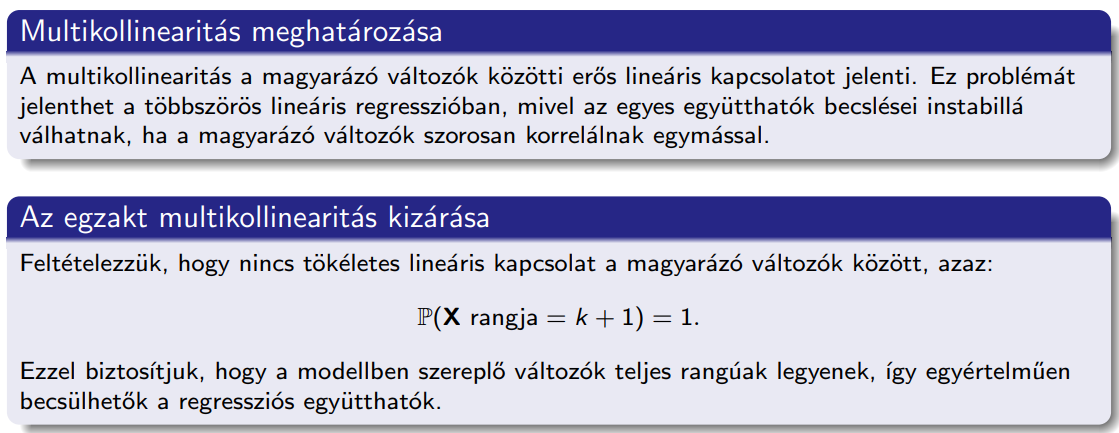

A multikollinearitás instabilitást okozhat lineáris regresszióban, mert az erősen korrelált független változók között nehéz megkülönböztetni, hogy melyik változó milyen mértékben járul hozzá az eredmény változásához. Ez a következő problémákhoz vezet:

- Pontatlan becslések a koefficiensekre
- Nagy variancia a koefficiensekben
- Gyengébb prediktív teljesítmény

Matematika háttér: közelítő lineáris függetlenség hiánya

Ha a független változók között erős korreláció áll fenn, akkor (𝑋.𝑇 @ 𝑋) közel szinguláris lesz (vagyis majdnem nem invertálható). Ez az inverz számítása során nagyon nagy értékeket eredményezhet, ami instabil és megbízhatatlan becslésekhez vezet.

Megoldás:

Magyarázó változók kidobása, bizonyos metrikák alapján pl.:

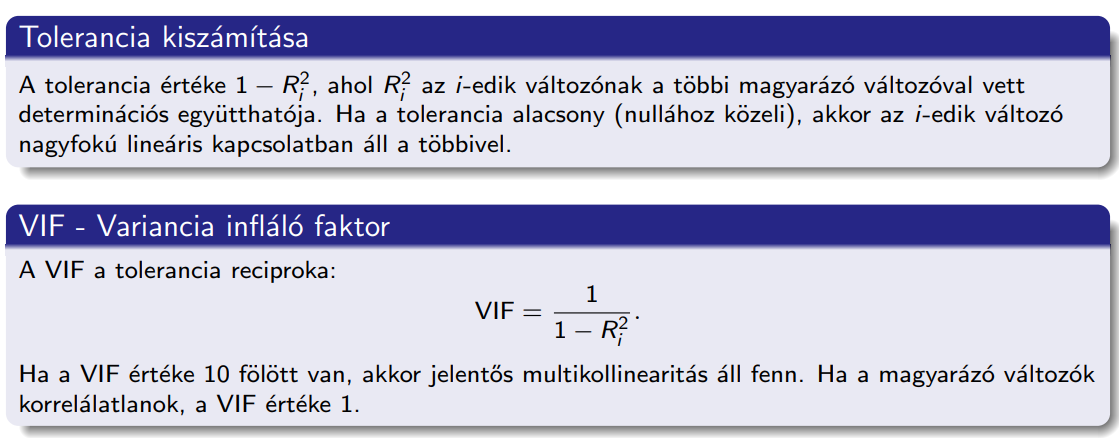

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X, i) for i in range(X.shape[1])]

[np.float64(3.755539459929965),
 np.float64(233.25019699881355),
 np.float64(233.25019699881355)]

Egyértelműen látszik ami a vizuális inspekció során is: X_1 és X_2 erősen korrelált. Ki kellene dobni az egyiket!

### Hibatagok vizsgálata

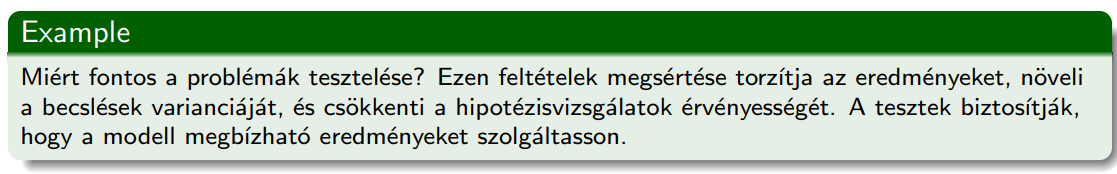

A tárgyon tanult modellben a becslések igazsága függ a hibatagok néhány tulajdonságától. Ezeket ebbena  részfeladatban vizsgálom:

#### a. Normalitás

In [67]:
Y = df["Y"].values
e = Y - (X @ b)

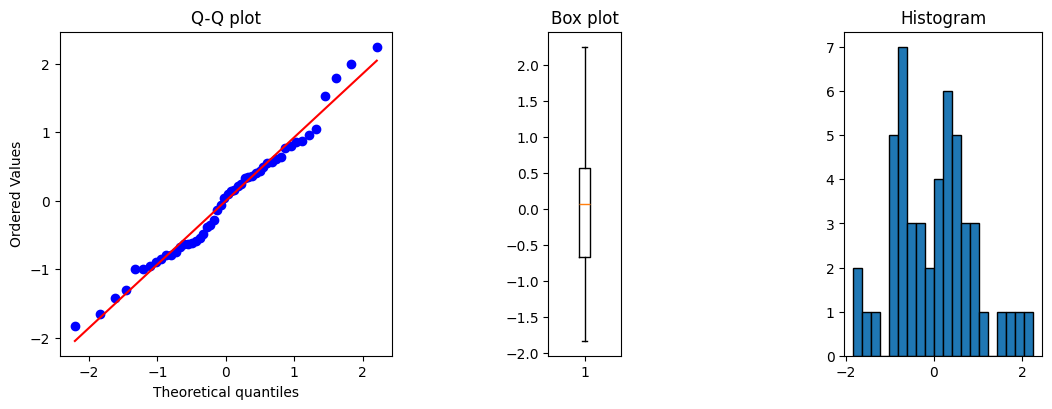

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Q-Q plot
stats.probplot(e, dist="norm", plot=axes[0])
axes[0].set_title('Q-Q plot')
axes[0].set_aspect('equal')

# Box plot
axes[1].boxplot(e)
axes[1].set_title('Box plot')
axes[1].set_aspect('equal')

# Histogram
axes[2].hist(e, bins=20, edgecolor='k')
axes[2].set_title('Histogram')
axes[2].set_aspect('equal')

# Adjust layout
plt.tight_layout()
plt.show()

Vizuális módszerek alapján normális eloszlásúnak tűnik, de vizsgáljuk meg statisztikai tesztekkel, hasonlóan az első feladathoz Shapiro-Wilk és Komogorov-Smirnov-ot használok:

In [69]:
stat, p = stats.shapiro(e)
print(f'Shapiro-Wilk test for error: Statistics={stat}, p={p}')
print('Gaussian' if p > 0.05 else 'not Gaussian')

stat, p = stats.kstest(e, 'norm')
print(f'Kolmogorov-Smirnov test for error: Statistics={stat}, p={p}')
print('Gaussian' if p > 0.05 else 'not Gaussian')

Shapiro-Wilk test for error: Statistics=0.980307153439621, p=0.5649891819959421
Gaussian
Kolmogorov-Smirnov test for error: Statistics=0.07834942790756551, p=0.8950677240508212
Gaussian


#### b. Várható érték

t-próbával ellenőrizhető, hogy van-e szignifikáns eltérés a 0-hoz képest:

- H0: nincs
- H1: van

In [73]:
mean_residual = np.mean(e)
std_residual = e.std(ddof=k+1)
SE = std_residual / np.sqrt(len(e))

alpha = 0.05
t_stat = mean_residual / SE
t_critical = stats.t.ppf(1 - alpha / 2, n-k-1)

print(f"Mean of residuals: {mean_residual}")
print(f"T-statistic: {t_stat}")
print(f"Critical value: ±{t_critical}")

if abs(t_stat) > t_critical:
    print("Reject the null hypothesis: The residuals do not have a zero mean.")
else:
    print("Fail to reject the null hypothesis: The residuals have a zero mean.")

Mean of residuals: -5.2098325653560095e-14
T-statistic: -3.9099031737149873e-13
Critical value: ±2.0128955989194286
Fail to reject the null hypothesis: The residuals have a zero mean.


#### c. Homoszkedaszticitás

In [74]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(e, X)

# Extract results
bp_stat = bp_test[0]       # Breusch-Pagan statistic
p_value = bp_test[1]       # p-value for the test

print(f"Breusch-Pagan statistic: {bp_stat}")
print(f"p-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: Residuals are heteroscedastic.")
else:
    print("Fail to reject the null hypothesis: Residuals are homoscedastic.")

Breusch-Pagan statistic: 0.8858042617729434
p-value: 0.6421700526262115
Fail to reject the null hypothesis: Residuals are homoscedastic.


A hibatagok varianciája tehát konstant.

#### d. Függetlenség

A Durbin-Watson teszt segítségével ellenőrizhetjük, hogy van-e korreláció a hibatagok között:

In [75]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(e)

print(f"Durbin-Watson statistic: {dw_stat}")

# Interpret the result
if 1.5 < dw_stat < 2.5:
    print("Residuals are likely independent (no autocorrelation).")
else:
    print("Residuals may have autocorrelation (dependency).")

Durbin-Watson statistic: 2.4147400157386136
Residuals are likely independent (no autocorrelation).


## Bónusz: Önellenőrzés beépített library-vel:

In [98]:
import statsmodels.api as sm

X = df[['X_1', 'X_2']]
y = df['Y']

# Add a constant (intercept term) to the model
X_with_intercept = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X_with_intercept).fit()

# Print the summary, which includes confidence intervals
print(model.summary())

# Extract confidence intervals directly
conf_intervals = model.conf_int(alpha=0.05)  # 95% CI by default
print("\nConfidence Intervals:")
conf_intervals


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     131.8
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           5.38e-20
Time:                        00:15:05   Log-Likelihood:                -65.885
No. Observations:                  50   AIC:                             137.8
Df Residuals:                      47   BIC:                             143.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.255      0.983      0.3

,0,1
const,-0.262926,0.764915
X_1,0.689020,3.365640
X_2,-2.699031,0.009964


# 3. Feladat